In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [2]:
btc = pd.read_csv('../dataset/Assets/btc_price.csv', encoding='unicode_escape')

In [3]:
btc.head()

,time,close
0,2010-07-17T02:00:00+02:00,0.04951
1,2010-07-18T02:00:00+02:00,0.08584
2,2010-07-19T02:00:00+02:00,0.08080
3,2010-07-20T02:00:00+02:00,0.07474
4,2010-07-21T02:00:00+02:00,0.07921


In [4]:
#Cleaning and reindexing
def cleaned_asset(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '2010-07-17') & (df.index <= '2022-11-02')]
    return df

In [5]:
btc = cleaned_asset(btc)

In [6]:
#BTC price visualization
def btc_visualization(): 
    plt.plot(btc, color= 'black')
    plt.title('Bitcoin/USD', fontsize= 20)
    plt.xlabel('Year', fontsize= 20)
    plt.ylabel('Price (USD)', fontsize= 20)
    plt.style.use('seaborn')
    return plt.show()

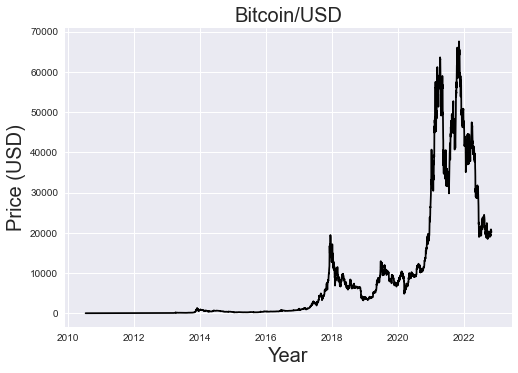

In [8]:
btc_visualization()

In [9]:
m2 = pd.read_csv ('../dataset/Indicators/monetary_supply.csv', encoding='unicode_escape')

def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '2010-07-17') & (df.index <= '2022-11-02')]
    return df

m2 = cleaned_indicator(m2)

In [11]:
#BTC price vs Monetary Supply
def btc_m2():
    fig, ax1 = plt.subplots()
    
    ax1.set_xlabel('Years', fontsize= 15)
    ax1.set_ylabel('Price (USD)', color='black', fontsize= 15)
    ax1.plot(btc.index, btc.close, color='black', label = 'SP 500', linewidth= 2, linestyle='solid')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(bbox_to_anchor=(1.1, 1.05), loc = 'upper left')
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Monetary Supply (M2 in USD billions)', color="r", fontsize= 15)  # we already handled the x-label with ax1
    ax2.plot(m2.index, m2['close (in billions)'], color="r", label = 'M2', linewidth=2, linestyle='--')
    ax2.tick_params(axis='y', labelcolor="r")
    ax2.legend(bbox_to_anchor=(1.1, 1), loc = 'upper left')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title("BTC vs M2", fontsize= 15)
    plt.style.use('seaborn-dark')   
    return plt.show()

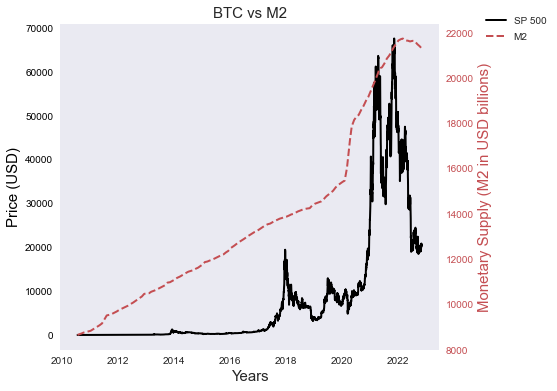

In [13]:
btc_m2()

In [17]:
#BTC price vs Monetary Supply (Log Scale)
def btc_m2_log():
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Years', fontsize= 15)
    ax1.set_ylabel('Price (USD)', color='black', fontsize= 15)
    ax1.plot(btc.index, btc.close, color='black', label = 'SP 500', linewidth= 2, linestyle='solid')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(bbox_to_anchor=(1.1, 1.05), loc = 'upper left')
    plt.yscale('log')
    
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Monetary Supply (M2 in USD billions)', color="r", fontsize= 15)  
    ax2.plot(m2.index, m2['close (in billions)'], color="r", label = 'M2', linewidth=2, linestyle='--')
    ax2.tick_params(axis='y', labelcolor="r")
    ax2.legend(bbox_to_anchor=(1.1, 1), loc = 'upper left')
    plt.yscale('log')

    fig.tight_layout()  
    plt.title("BTC vs M2 (Log Scale)", fontsize= 15)
    plt.style.use('seaborn')   
    return plt.show()

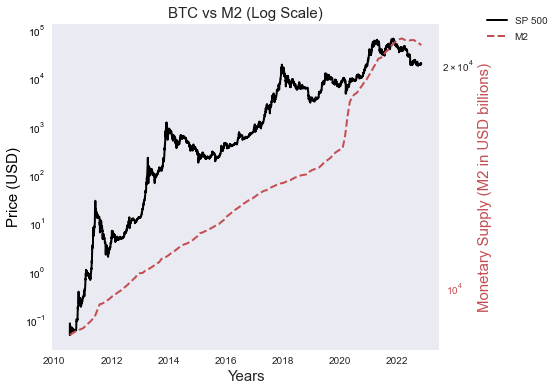

In [18]:
btc_m2_log()